In [35]:
import pandas as pd
import numpy as np

In [36]:
df1=pd.read_csv('visualize_results_cvpr/cifar10_0.5_sym.csv')
df2=pd.read_csv('visualize_results_cvpr/cifar100_0.5_asym.csv')
df3=pd.read_csv('visualize_results_cvpr/flower_0.5_sym.csv')
df4=pd.read_csv('visualize_results_cvpr/pet_0.5_asym.csv')

In [37]:
df5=pd.read_csv('visualize_results_cvpr/cifar10_0.25_sym.csv')
df6=pd.read_csv('visualize_results_cvpr/cifar100_0.25_asym.csv')
df7=pd.read_csv('visualize_results_cvpr/flower_0.25_sym.csv')
df8=pd.read_csv('visualize_results_cvpr/pet_0.25_asym.csv')

In [38]:
df9=pd.read_csv('visualize_results_cvpr/cifar10_0.75_sym.csv')
df10=pd.read_csv('visualize_results_cvpr/cifar100_0.75_asym.csv')
df11=pd.read_csv('visualize_results_cvpr/flower_0.75_sym.csv')
df12=pd.read_csv('visualize_results_cvpr/pet_0.75_asym.csv')

In [39]:
import matplotlib.pyplot as plt
set_basic_names = ['pretrain','inctrain'] 
set_LNL_names = ['Coteaching', 'Coteachingplus', 'Decoupling', 'DISC', 'ELR', 'GJS', 'JoCoR', 'NegativeLearning', 'PENCIL'] 
set_MU_names = [ 'FT', 'GA', 'GA_l1', 'wfisher'] 
set_OUR_names = ['CRUL']

# 生成配色方案 
set_basic_colors = plt.cm.Blues(np.linspace(0.3, 0.5, len(set_basic_names))) 
set_LNL_colors = plt.cm.Greens(np.linspace(0.3, 0.8, len(set_LNL_names))) 
set_MU_colors = plt.cm.Purples(np.linspace(0.3, 0.7, len(set_MU_names))) 
set_OUR_colors = plt.cm.Oranges(np.linspace(0.6, 0.6, len(set_MU_names))) 

# 创建字典 
uni_color_dict = {}
# 将颜色和 uni_name 配对 
for name, color in zip(set_basic_names, set_basic_colors): 
    uni_color_dict[name] = color 
for name, color in zip(set_LNL_names, set_LNL_colors): 
    uni_color_dict[name] = color 
for name, color in zip(set_MU_names, set_MU_colors): 
    uni_color_dict[name] = color 
for name, color in zip(set_OUR_names, set_OUR_colors): 
    uni_color_dict[name] = color

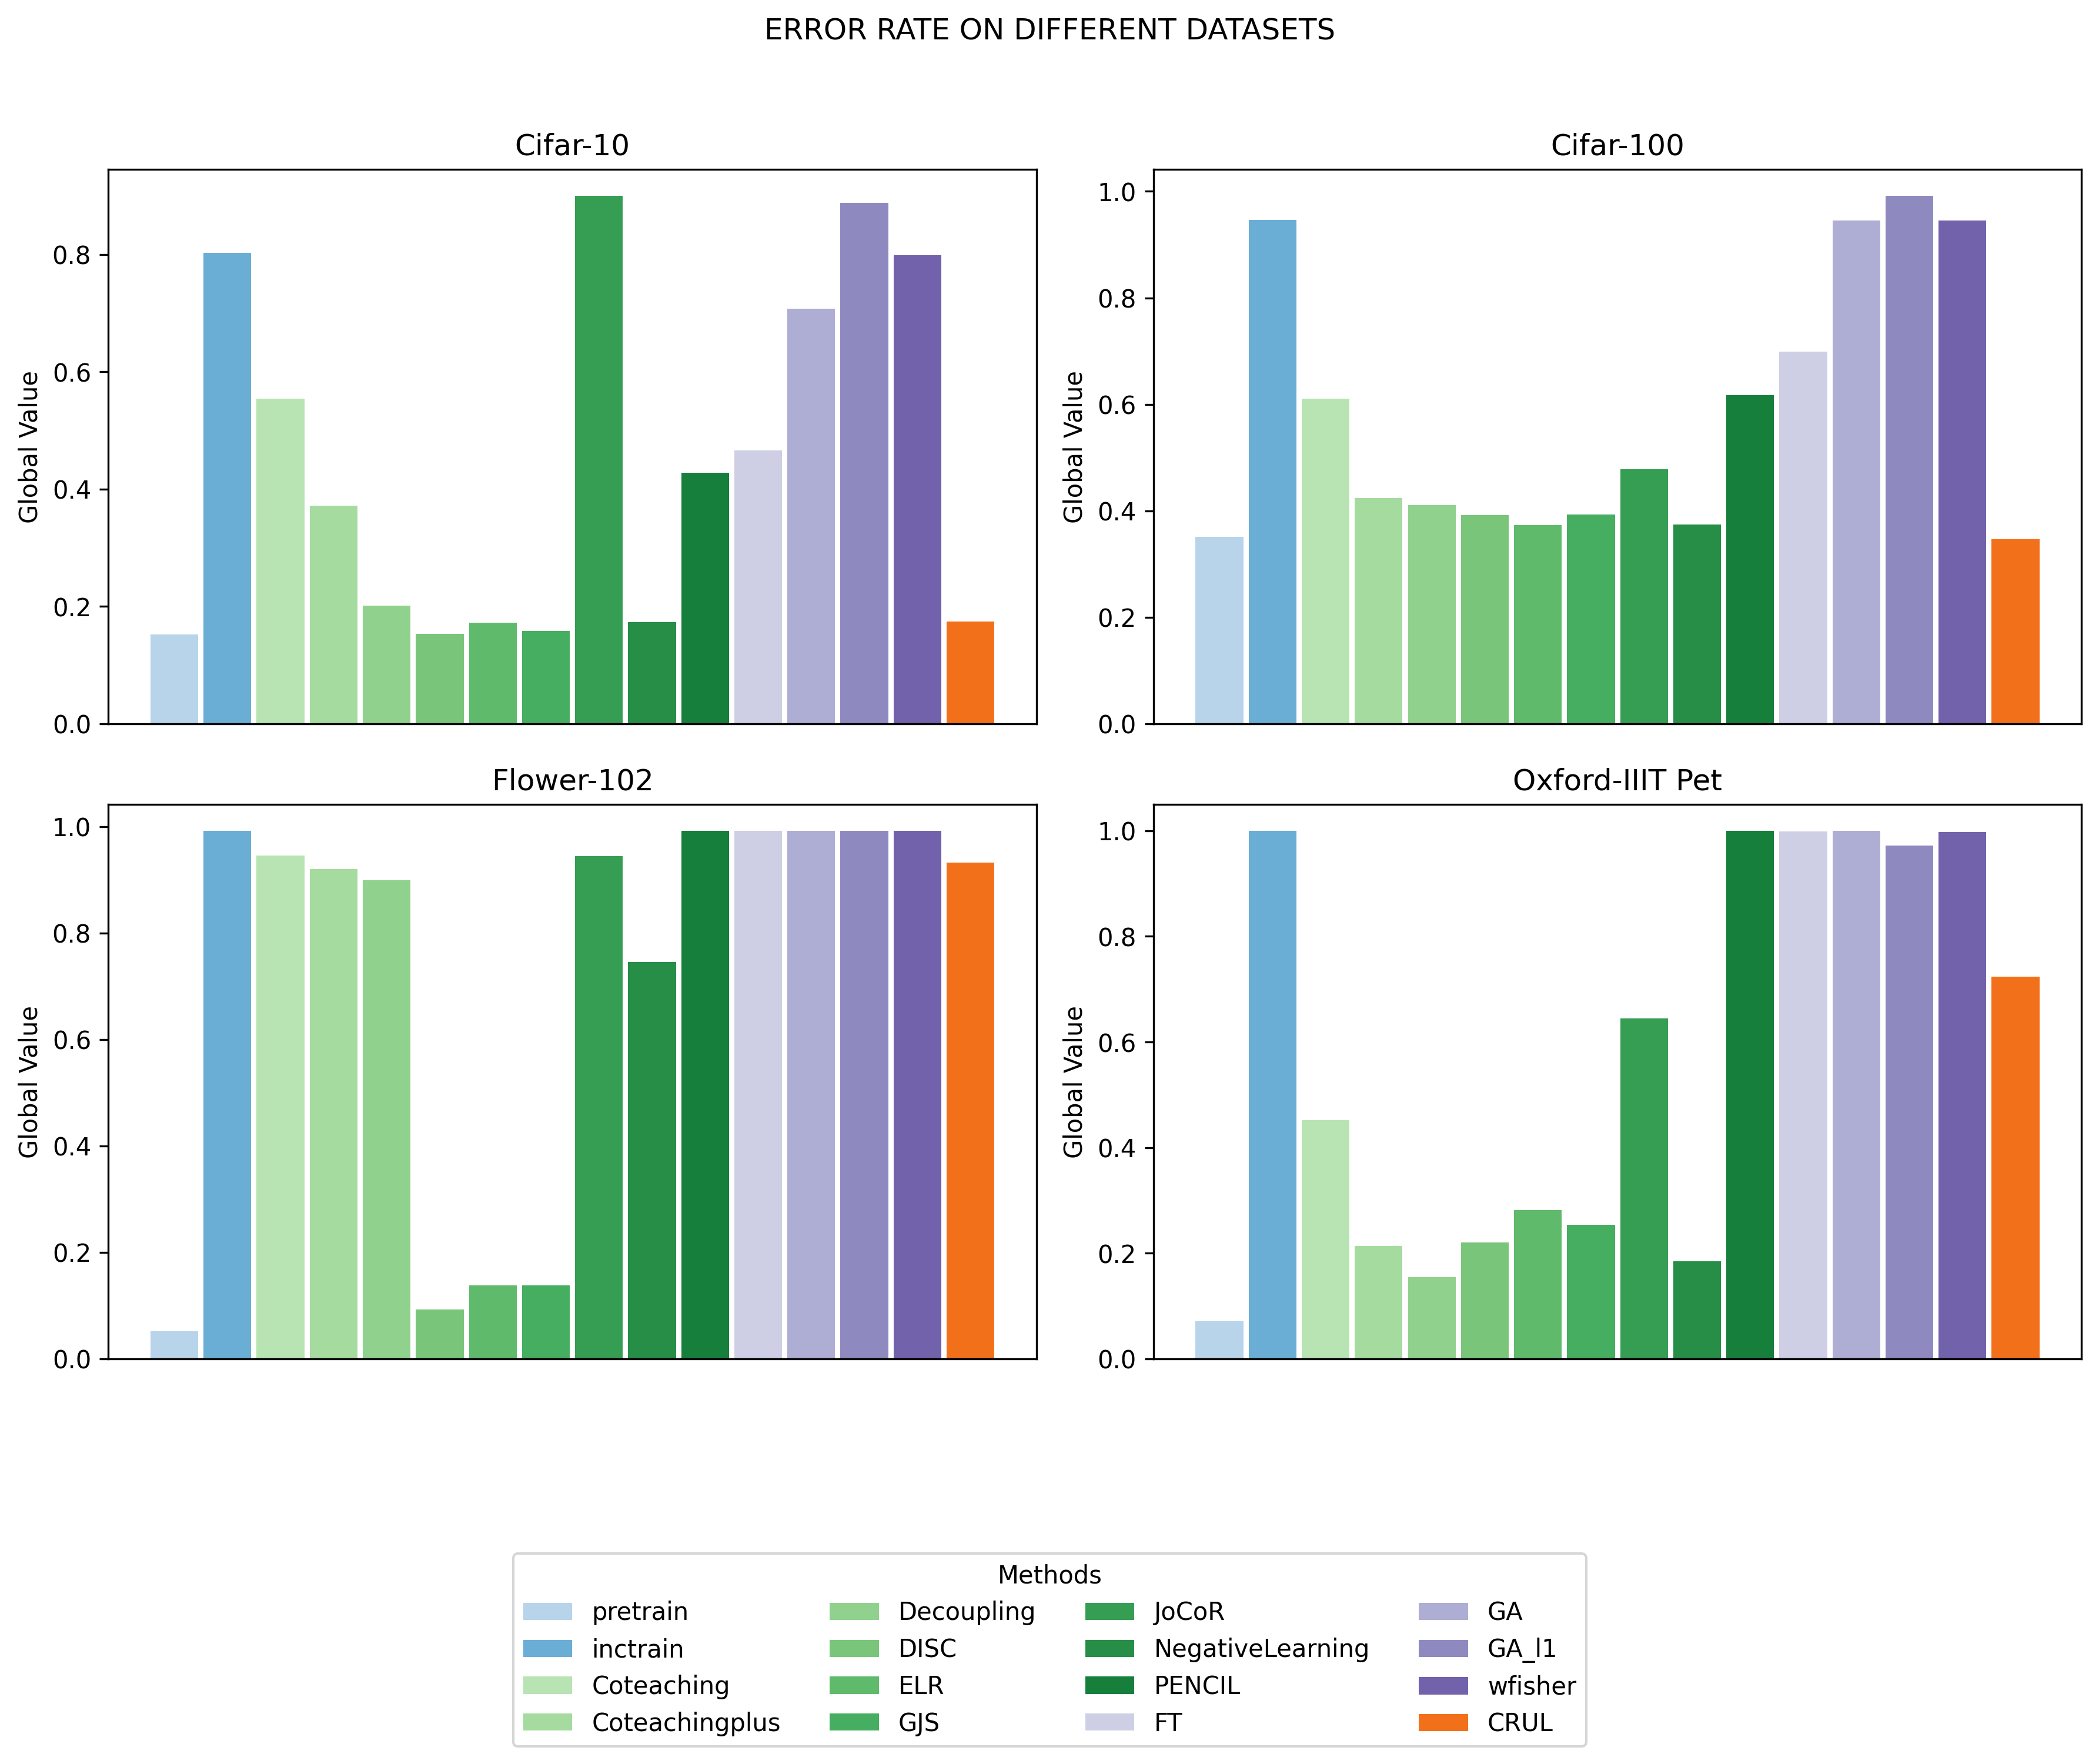

In [40]:
import matplotlib.pyplot as plt
dataframes = [df1,df2,df3,df4] 
labels = ['Cifar-10', 'Cifar-100', 'Flower-102', 'Oxford-IIIT Pet'] 
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 

for i, (df, label) in enumerate(zip(dataframes, labels)):
    ax = axs[i // 2, i % 2]
    for j, (method, global_val) in enumerate(zip(df['uni_name'], df['error_rate'])):
        ax.bar(method, global_val, color=uni_color_dict[method], label=method if i == 0 else "",width=0.9) 
    ax.set_title(f'{label}')
    # ax.set_xlabel('Algorithm') 
    ax.set_ylabel('Global Value')
    ax.set_xticks([])
    # ax.grid(True,linestyle='--',alpha=0.7)

handles, labels = [], [] 
for ax in axs.flat: 
    h, l = ax.get_legend_handles_labels() 
    handles.extend(h) 
    labels.extend(l) 

n_cols = 4 # 图例列数 
fig.legend(handles, labels, loc='upper center', ncol=n_cols, bbox_to_anchor=(0.5, -0.1), title="Methods")

#整体标题
fig.suptitle('ERROR RATE ON DIFFERENT DATASETS')

# 调整布局 
plt.tight_layout(rect=[0, 0, 1, 0.96])  
fig.set_dpi(300)
# 留出顶部空间给图例 
plt.show()


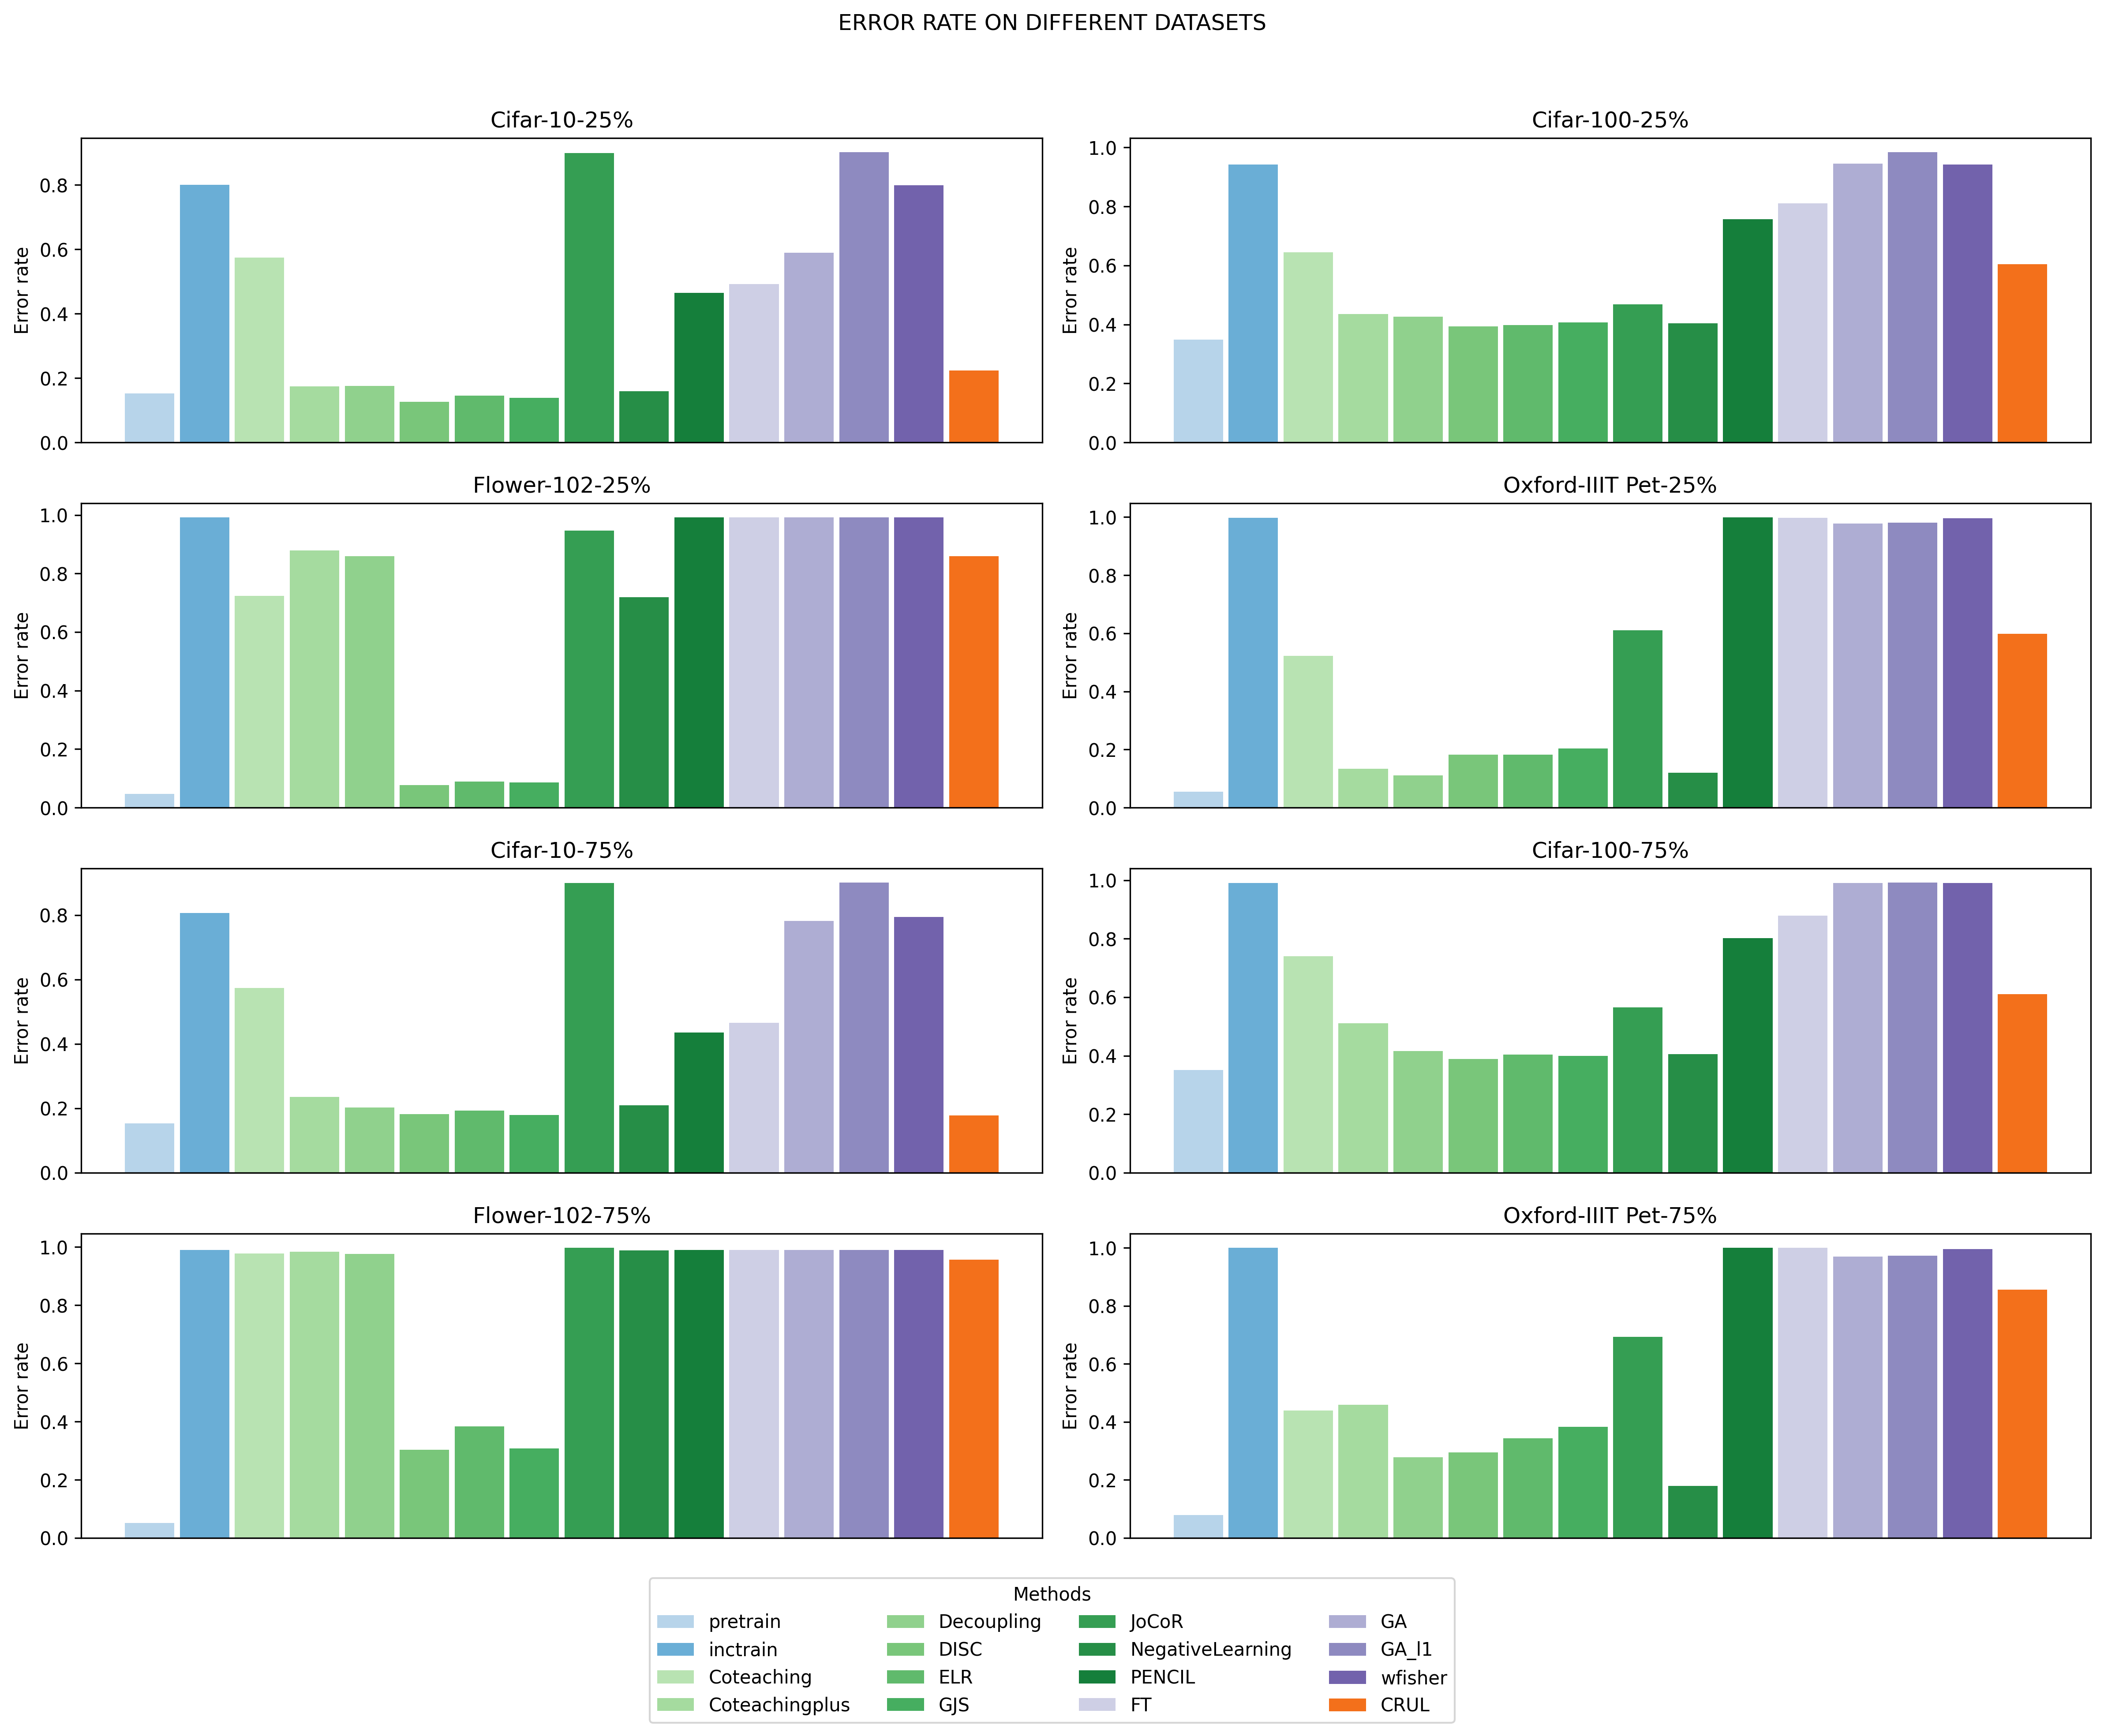

In [41]:
import matplotlib.pyplot as plt
dataframes = [df5,df6,df7,df8,df9,df10,df11,df12] 
labels = ['Cifar-10-25%', 'Cifar-100-25%', 'Flower-102-25%', 'Oxford-IIIT Pet-25%','Cifar-10-75%', 'Cifar-100-75%', 'Flower-102-75%', 'Oxford-IIIT Pet-75%'] 

fig, axs = plt.subplots(4, 2, figsize=(16, 12)) 

for i, (df, label) in enumerate(zip(dataframes, labels)):
    ax = axs[i // 2, i % 2]
    for j, (method, global_val) in enumerate(zip(df['uni_name'], df['error_rate'])):
        ax.bar(method, global_val, color=uni_color_dict[method], label=method if i == 0 else "",width=0.9) 
    ax.set_title(f'{label}')
    # ax.set_xlabel('Algorithm') 
    ax.set_ylabel('Error rate')
    ax.set_xticks([])
    # ax.grid(True,linestyle='--',alpha=0.7)

handles, labels = [], [] 
for ax in axs.flat: 
    h, l = ax.get_legend_handles_labels() 
    handles.extend(h) 
    labels.extend(l) 

n_cols = 4 # 图例列数 
fig.legend(handles, labels, loc='upper center', ncol=n_cols, bbox_to_anchor=(0.5,0), title="Methods")

#整体标题
fig.suptitle('ERROR RATE ON DIFFERENT DATASETS')

# 调整布局 
plt.tight_layout(rect=[0, 0, 1, 0.96])  
fig.set_dpi(300)
# 留出顶部空间给图例 
plt.show()


In [42]:
#同一数据集、不同噪声比例画雷达图
df1

,Unnamed: 0,uni_name,global,error_rate,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,pretrain,0.847333,0.152667,0.842734,0.919428,0.768922,0.767023,0.843729,0.729339,0.888140,0.878278,0.929521,0.900198
1,1,inctrain,0.196867,0.803133,0.256802,0.162443,0.150703,0.131509,0.172685,0.179752,0.337601,0.215871,0.206117,0.157303
2,2,Coteaching,0.445867,0.554133,0.000000,0.945419,0.000000,0.000000,0.000000,0.849862,0.918464,0.821789,0.940160,0.000000
3,3,Coteachingplus,0.628533,0.371467,0.865959,0.919428,0.803081,0.109479,0.009849,0.012397,0.930593,0.870881,0.907580,0.840053
4,4,Decoupling,0.798533,0.201467,0.773723,0.902534,0.760884,0.578104,0.795141,0.769284,0.808625,0.889038,0.852394,0.851950
5,5,DISC,0.846667,0.153333,0.853351,0.923977,0.833222,0.689586,0.770190,0.790634,0.871294,0.881641,0.920878,0.928619
6,6,ELR,0.827800,0.172200,0.917717,0.920728,0.797053,0.629506,0.735391,0.779614,0.828841,0.909886,0.884309,0.871778
7,7,GJS,0.841800,0.158200,0.856005,0.927225,0.852646,0.688919,0.789888,0.792011,0.832884,0.853396,0.918883,0.902181
8,8,JoCoR,0.100467,0.899533,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,9,NegativeLearning,0.826267,0.173733,0.847379,0.928525,0.768922,0.600134,0.854235,0.749311,0.878706,0.855414,0.904255,0.869795


In [48]:
df5

,Unnamed: 0,uni_name,global,error_rate,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
6,6,ELR,0.854667,0.145333,0.945333,0.958801,0.803571,0.742588,0.844072,0.741525,0.862252,0.838235,0.908367,0.886333
7,7,GJS,0.862000,0.138000,0.880000,0.906367,0.802198,0.696765,0.889175,0.816384,0.858278,0.879679,0.944223,0.937754
8,8,JoCoR,0.100000,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,9,NegativeLearning,0.840400,0.159600,0.877333,0.933833,0.815934,0.711590,0.806701,0.751412,0.870199,0.860963,0.901726,0.861976
10,10,PENCIL,0.535600,0.464400,0.574667,0.656679,0.432692,0.308625,0.470361,0.415254,0.672848,0.552139,0.650730,0.603518
11,11,FT,0.507467,0.492533,0.570667,0.630462,0.405220,0.260108,0.462629,0.378531,0.655629,0.487968,0.632138,0.571042
12,12,GA,0.410267,0.589733,0.450667,0.509363,0.331044,0.200809,0.318299,0.313559,0.566887,0.419786,0.541833,0.435724
13,13,GA_l1,0.098400,0.901600,0.044000,0.166042,0.163462,0.000000,0.048969,0.110169,0.091391,0.245989,0.014608,0.098782
14,14,wfisher,0.200533,0.799467,0.270667,0.166042,0.153846,0.130728,0.158505,0.187853,0.349669,0.160428,0.248340,0.178620
